In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sts

# 1.Load the dataset into python environment

In [2]:
dataset=pd.read_csv('titanic_dataset (1).csv')
dataset.head()
                   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make 'PassengerId' as index column

In [3]:
dataset=dataset.set_index('PassengerId')
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.Check basic details of the dataset

In [4]:
dataset.shape

(891, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4.Fill in all missing values present in all the columns in the datase

In [9]:
dataset.isnull().sum()/dataset.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [10]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

dataset.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])


Cabin has 77% of missing values so we cannot just fill it


In [12]:
dataset.drop(['Cabin'],axis = 1,inplace=True)

In [13]:
dataset.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5.Check and handle outliers in atleast 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x275fda878b0>,
 'caps': [<matplotlib.lines.Line2D at 0x275fe14d3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fda94b50>],
 'medians': [<matplotlib.lines.Line2D at 0x275fe14d880>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fe14db50>],
 'means': []}

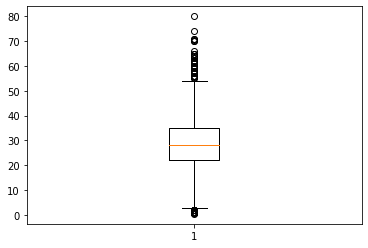

In [14]:
plt.boxplot(dataset['Age'])

In [15]:
#using IQR method to identify those outliers

Q1=np.percentile(dataset['Age'],25,interpolation='midpoint')
Q2=np.percentile(dataset['Age'],50,interpolation='midpoint')
Q3=np.percentile(dataset['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [16]:
IQR=Q3-Q1
IQR

13.0

In [17]:
lower=Q1-1.5*IQR
print(lower)
upper=Q3+1.5*IQR
print(upper)

2.5
54.5


In [18]:
outliers=[]
for i in dataset['Age']:
    if(i>upper)or(i<lower):
        outliers.append(i)

In [19]:
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [20]:

ind1=dataset['Age']>upper
dataset.loc[ind1].index 

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [21]:
ind2=dataset['Age']<lower
dataset.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [22]:
dataset=dataset.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8, 17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832])

{'whiskers': [<matplotlib.lines.Line2D at 0x275fe24a940>,
 'caps': [<matplotlib.lines.Line2D at 0x275fe24aee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275fe24a670>],
 'medians': [<matplotlib.lines.Line2D at 0x275fe2574c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275fe257790>],
 'means': []}

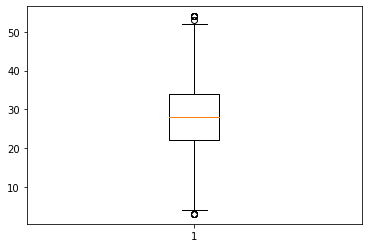

In [23]:
plt.boxplot(dataset['Age'])

In [24]:
#Outliers in Sibsp

In [25]:
Q1=np.percentile(dataset['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(dataset['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(dataset['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [26]:
IQR=Q3-Q1
IQR

1.0

In [27]:
lower=Q1-1.5*IQR
print(lower)
upper=Q3+1.5*IQR
print(upper)

-1.5
2.5


In [28]:
outliers=[]
for i in dataset['SibSp']:
    if(i>upper)or(i<lower):
        outliers.append(i)

In [29]:
outliers

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [30]:
ind1=dataset['SibSp']>upper
dataset.loc[ind1].index 

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [31]:
ind2=dataset['SibSp']<lower
dataset.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [32]:
dataset=dataset.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864])

In [33]:
dataset.shape

(786, 10)

Outlier in Fare

In [34]:
Q1=np.percentile(dataset['Fare'],25,interpolation='midpoint')
Q2=np.percentile(dataset['Fare'],50,interpolation='midpoint')
Q3=np.percentile(dataset['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [35]:
IQR=Q3-Q1
IQR

19.8542

In [36]:
lower=Q1-1.5*IQR
print(lower)
upper=Q3+1.5*IQR
print(upper)

-21.885499999999997
57.5313


In [37]:
outliers=[]
for i in dataset['Fare']:
    if(i>upper)or(i<lower):
        outliers.append(i)

In [38]:
outliers

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [39]:
ind1=dataset['Fare']>upper
out_fare=dataset.loc[ind1].index 
out_fare

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [40]:
dataset=dataset.drop(out_fare)

# MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [42]:
scaled_values=scaler.fit_transform(dataset[['Pclass', 'Age', 'SibSp', 'Parch','Fare']])
scaled_dataset=pd.DataFrame(scaled_values,columns=['Pclass', 'Age', 'SibSp', 'Parch','Fare'])
scaled_dataset

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.5,0.000000,0.127193
1,1.0,0.450980,0.0,0.000000,0.139035
2,0.0,0.627451,0.5,0.000000,0.931579
3,1.0,0.627451,0.0,0.000000,0.141228
4,1.0,0.490196,0.0,0.000000,0.148391
...,...,...,...,...,...
679,0.5,0.470588,0.0,0.000000,0.228070
680,0.0,0.313725,0.0,0.000000,0.526316
681,1.0,0.490196,0.5,0.333333,0.411404
682,0.0,0.450980,0.0,0.000000,0.526316


In [43]:
scaled_dataset.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000
